# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [293]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [295]:
# Importing the file porter_data_1.csv
porter_df=pd.read_csv('porter_data_1.csv')
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [297]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter_df.created_at=pd.to_datetime(porter_df.created_at)
porter_df.actual_delivery_time=pd.to_datetime(porter_df.actual_delivery_time)
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [299]:
# Convert categorical features to category type
porter_df.market_id=porter_df.market_id.astype('category')
porter_df.order_protocol=porter_df.order_protocol.astype('category')
porter_df.store_primary_category=porter_df.store_primary_category.astype('category')
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [301]:
# Calculate time taken in minutes
porter_df['time_taken']=(porter_df['actual_delivery_time']-porter_df['created_at']).dt.total_seconds()/60
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [303]:
# Extract the hour and day of week from the 'created_at' timestamp
porter_df['created_at_hour']=porter_df.created_at.dt.hour
porter_df['created_on_day']=porter_df.created_at.dt.day_of_week

# Create a categorical feature 'isWeekend'
porter_df['isWeekend']=porter_df.created_on_day.apply(lambda x: 1 if x >= 5 else 0)

# Convert new columns to categorical variable
porter_df.created_at_hour = porter_df.created_at_hour.astype('category')
porter_df.created_on_day = porter_df.created_on_day.astype('category')
porter_df.isWeekend = porter_df.isWeekend.astype('category')
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [305]:
# Drop unnecessary columns
porter_df=porter_df.drop(['created_at', 'actual_delivery_time','created_on_day'], axis=1)
porter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken                175777 non-null  float64 
 13  created_at_hour           175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [307]:
# Define target variable (y) and features (X)
y=porter_df['time_taken']
X=porter_df.drop(columns=['time_taken'])
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  created_at_hour           175777 non-null  category
 13  isWeekend                 175

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [309]:
# Split data into training and testing sets
np.random.seed(0)
porter_df_train, porter_df_test = train_test_split(porter_df, train_size = 0.8, test_size = 0.2, random_state = 100)

print(f'porter_df_test.shape : {porter_df_test.shape}')
print(f'porter_df_train.shape : {porter_df_train.shape}')

porter_df_test.shape : (35156, 15)
porter_df_train.shape : (140621, 15)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [311]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns=['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
categorical_columns=['market_id', 'store_primary_category', 'order_protocol','isWeekend', 'created_at_hour']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

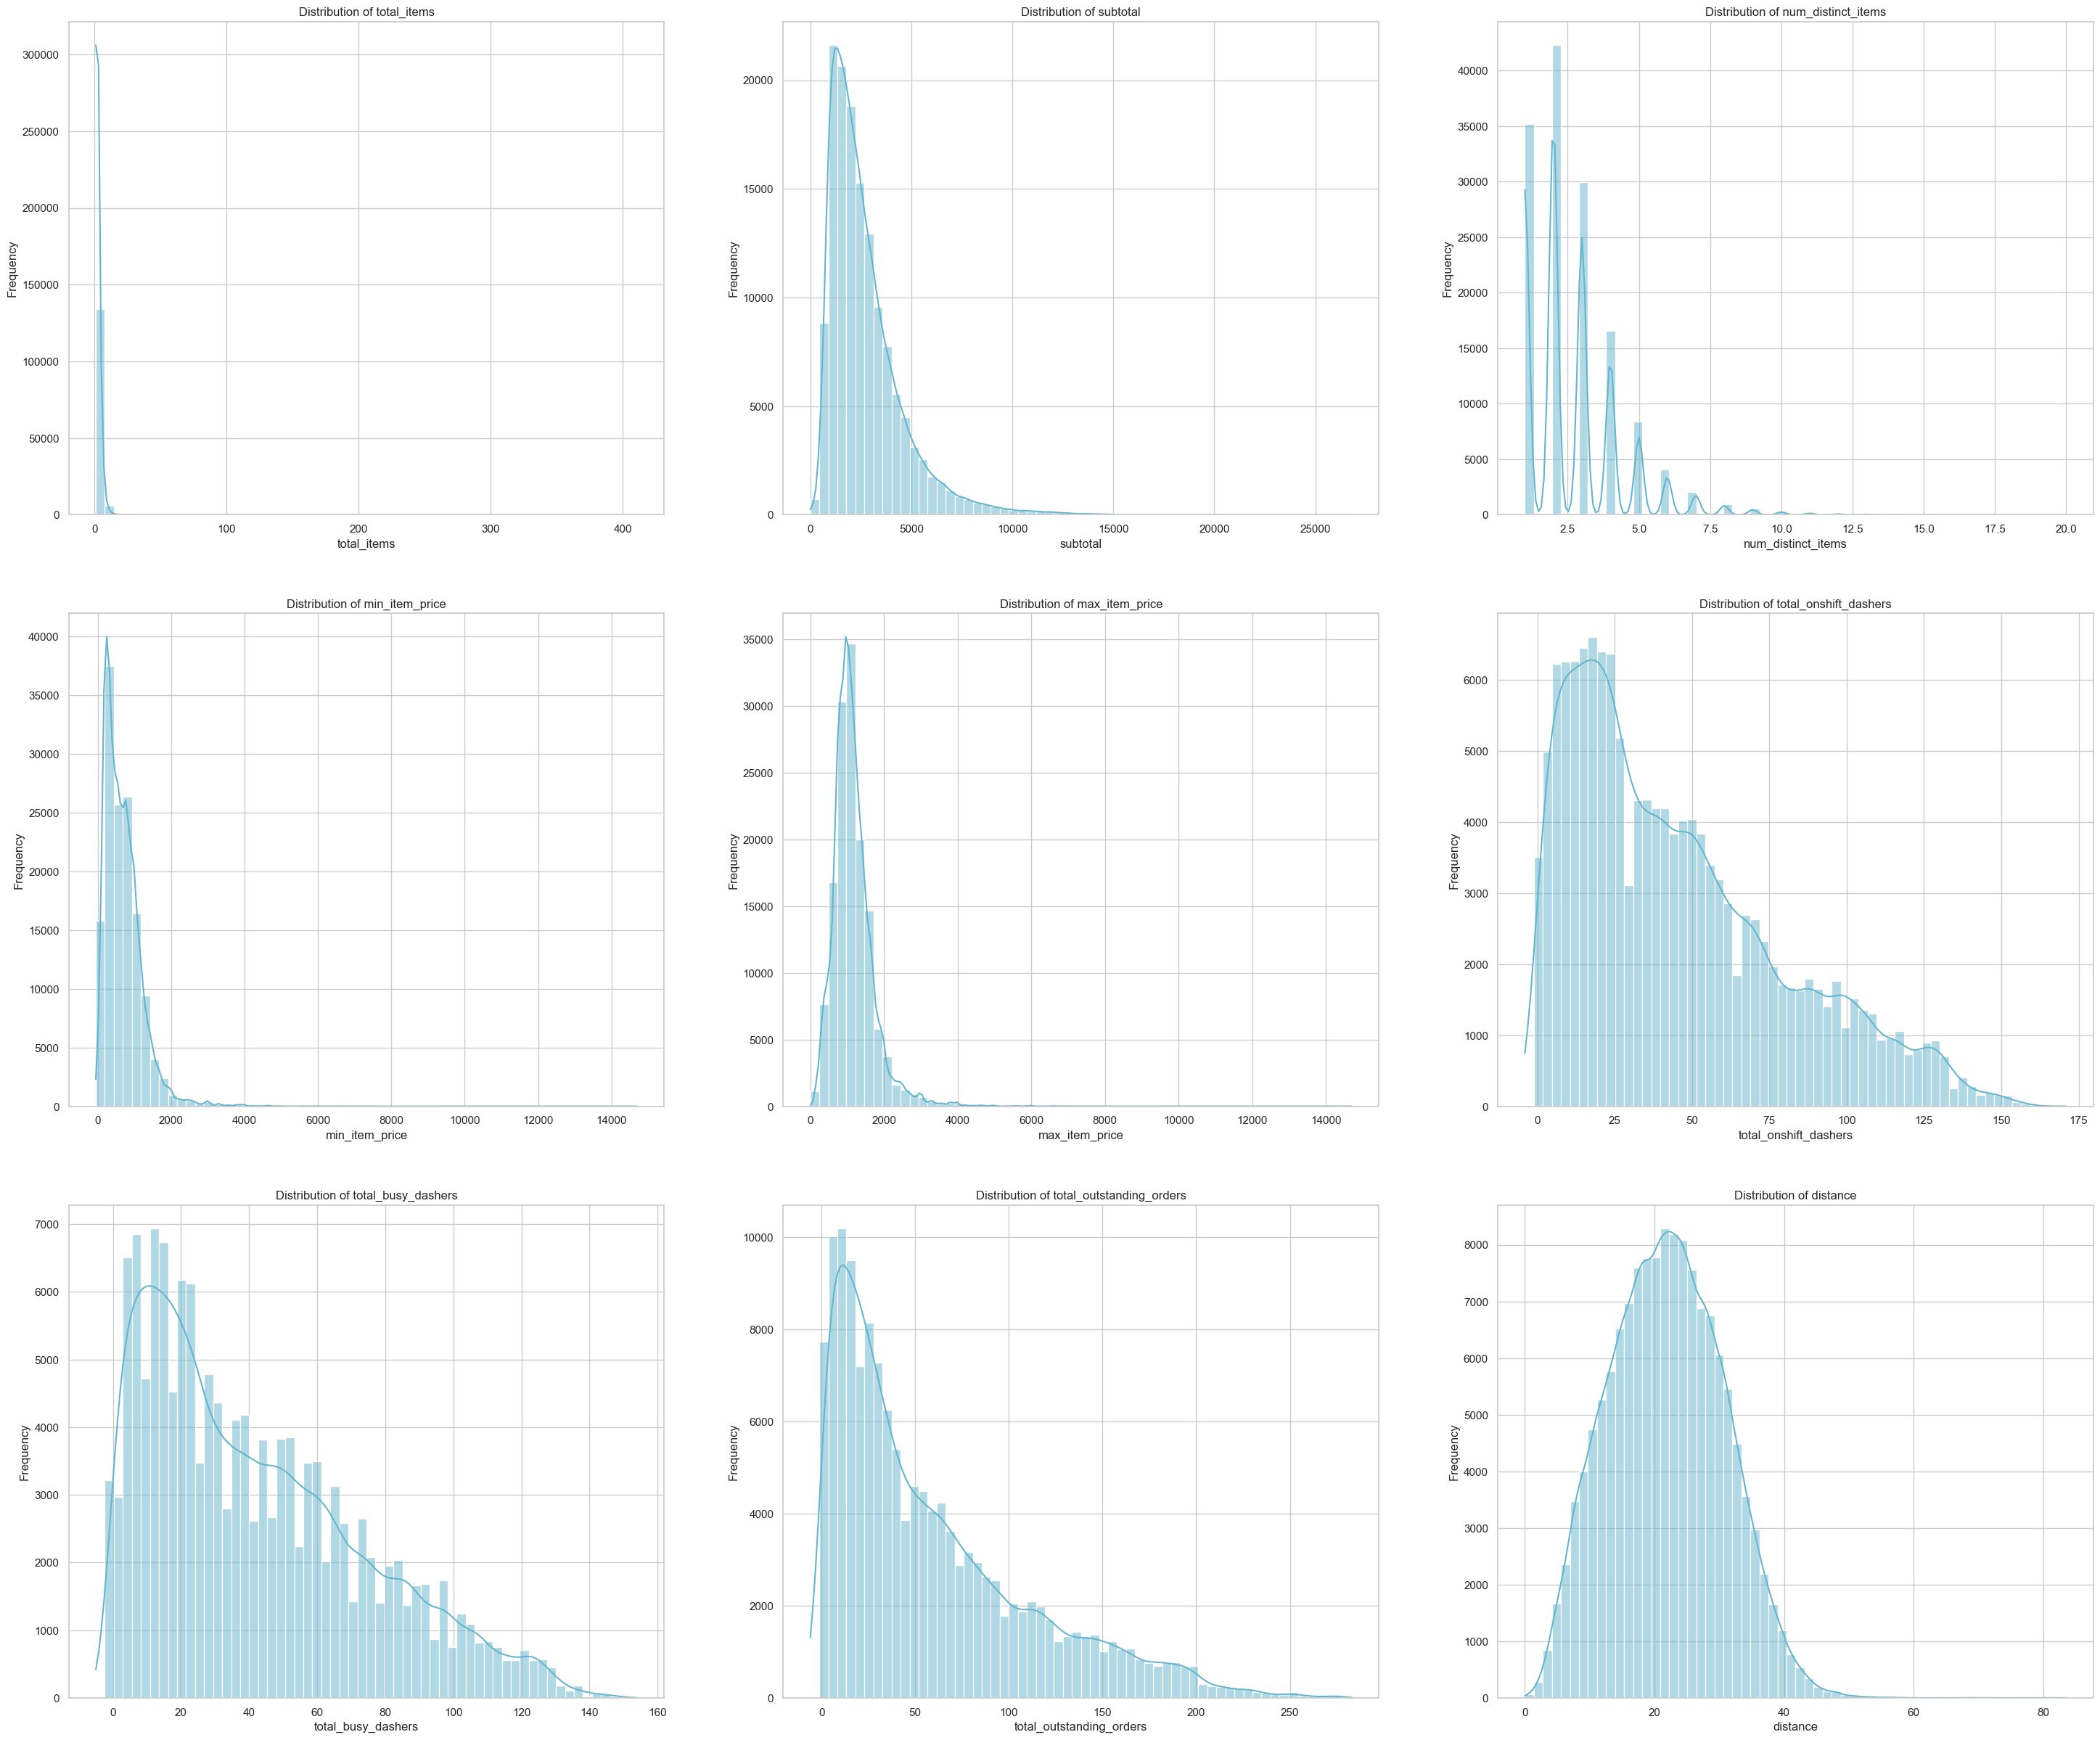

In [313]:
# Plot distributions for all numerical columns

plt.figure(figsize=(36, 30))

for i, col in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.histplot(porter_df_train[col], bins=60, kde=True, color='c')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [314]:
# Distribution of categorical columns
plt.figure(figsize=(25, 37))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns),1,i+1)
    sns.countplot(data=porter_df_train, x=col, color='orange')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

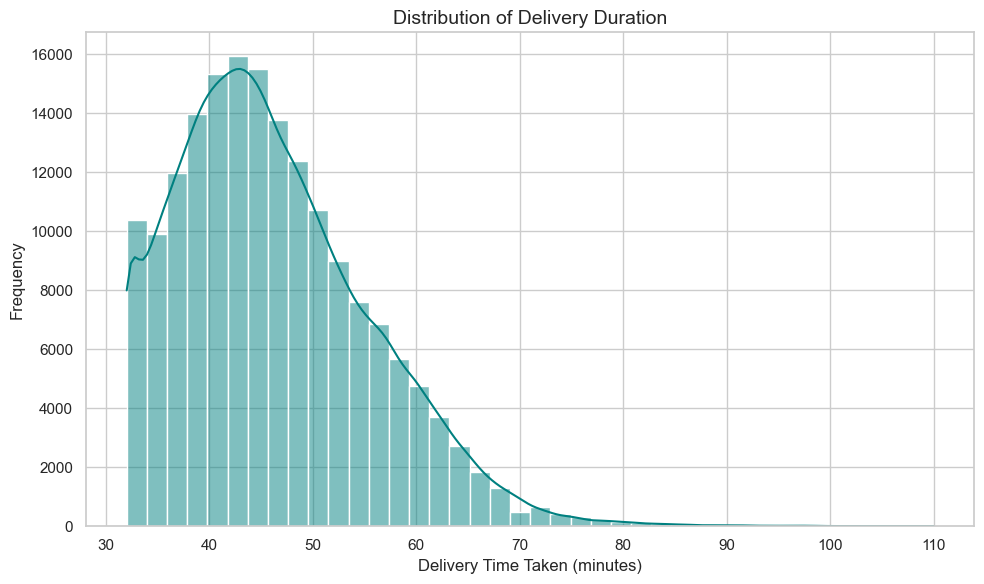

In [316]:
# Distribution of time_taken
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=40, kde=True, color='teal')
plt.title('Distribution of Delivery Duration', fontsize=14)
plt.xlabel('Delivery Time Taken (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### As per above plot ####

1. The distribution is *right-skewed*, meaning:
    - Most deliveries occur within a shorter time.
    - A few deliveries take much longer, creating a long tail.

2. There are possible outliers on the higher end.


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

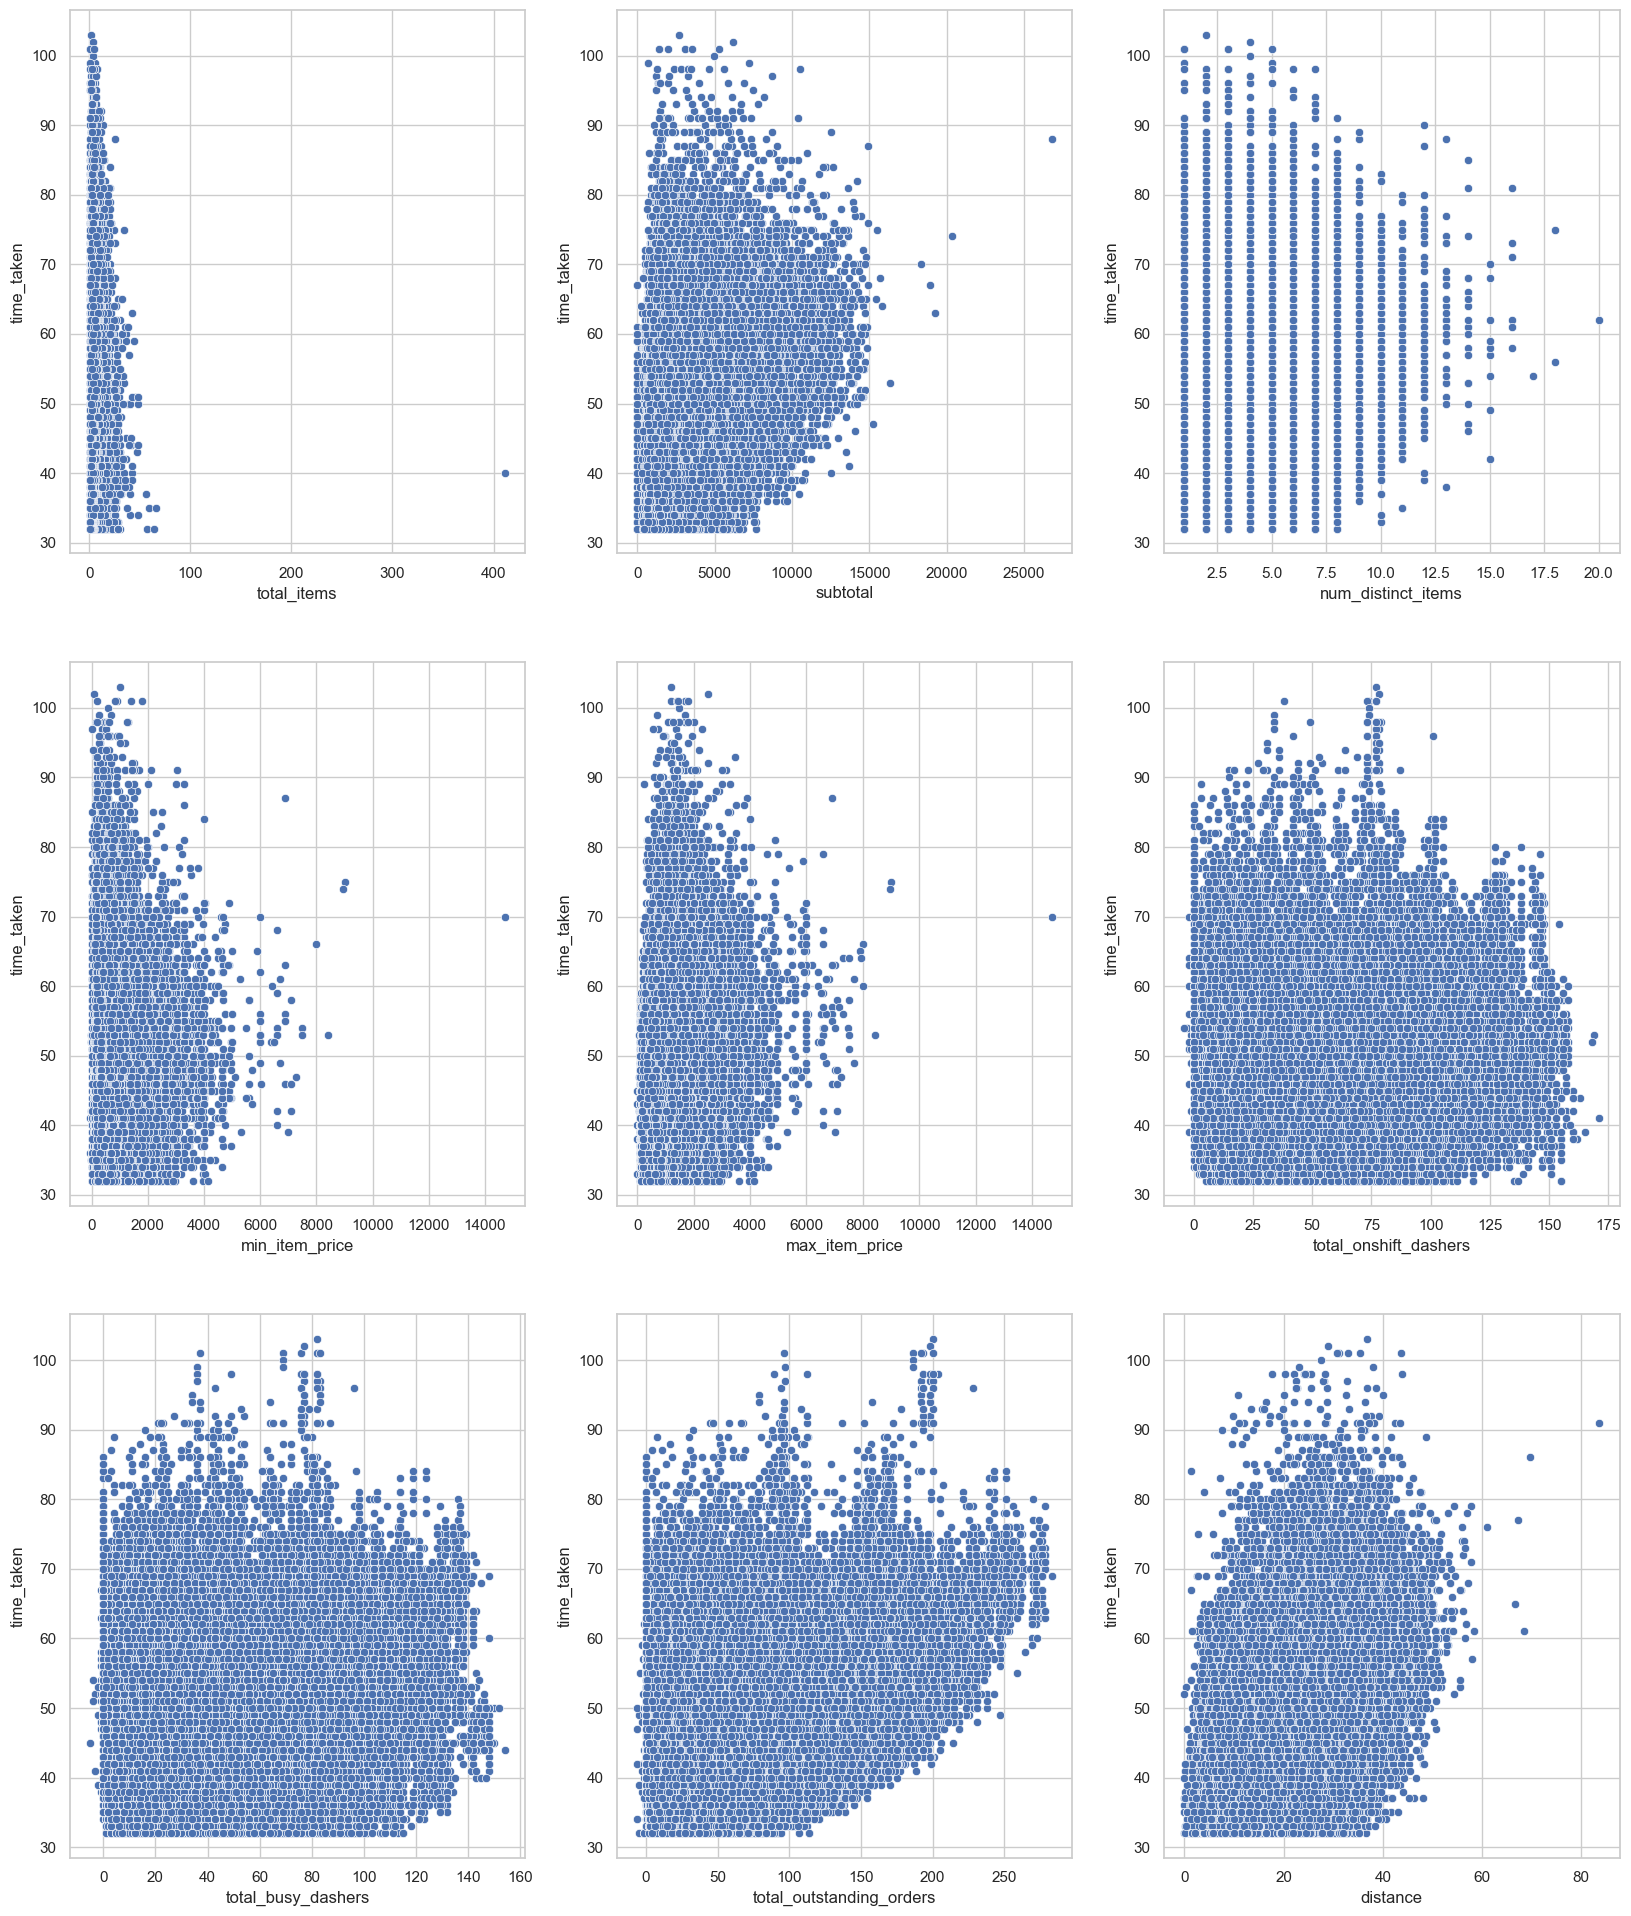

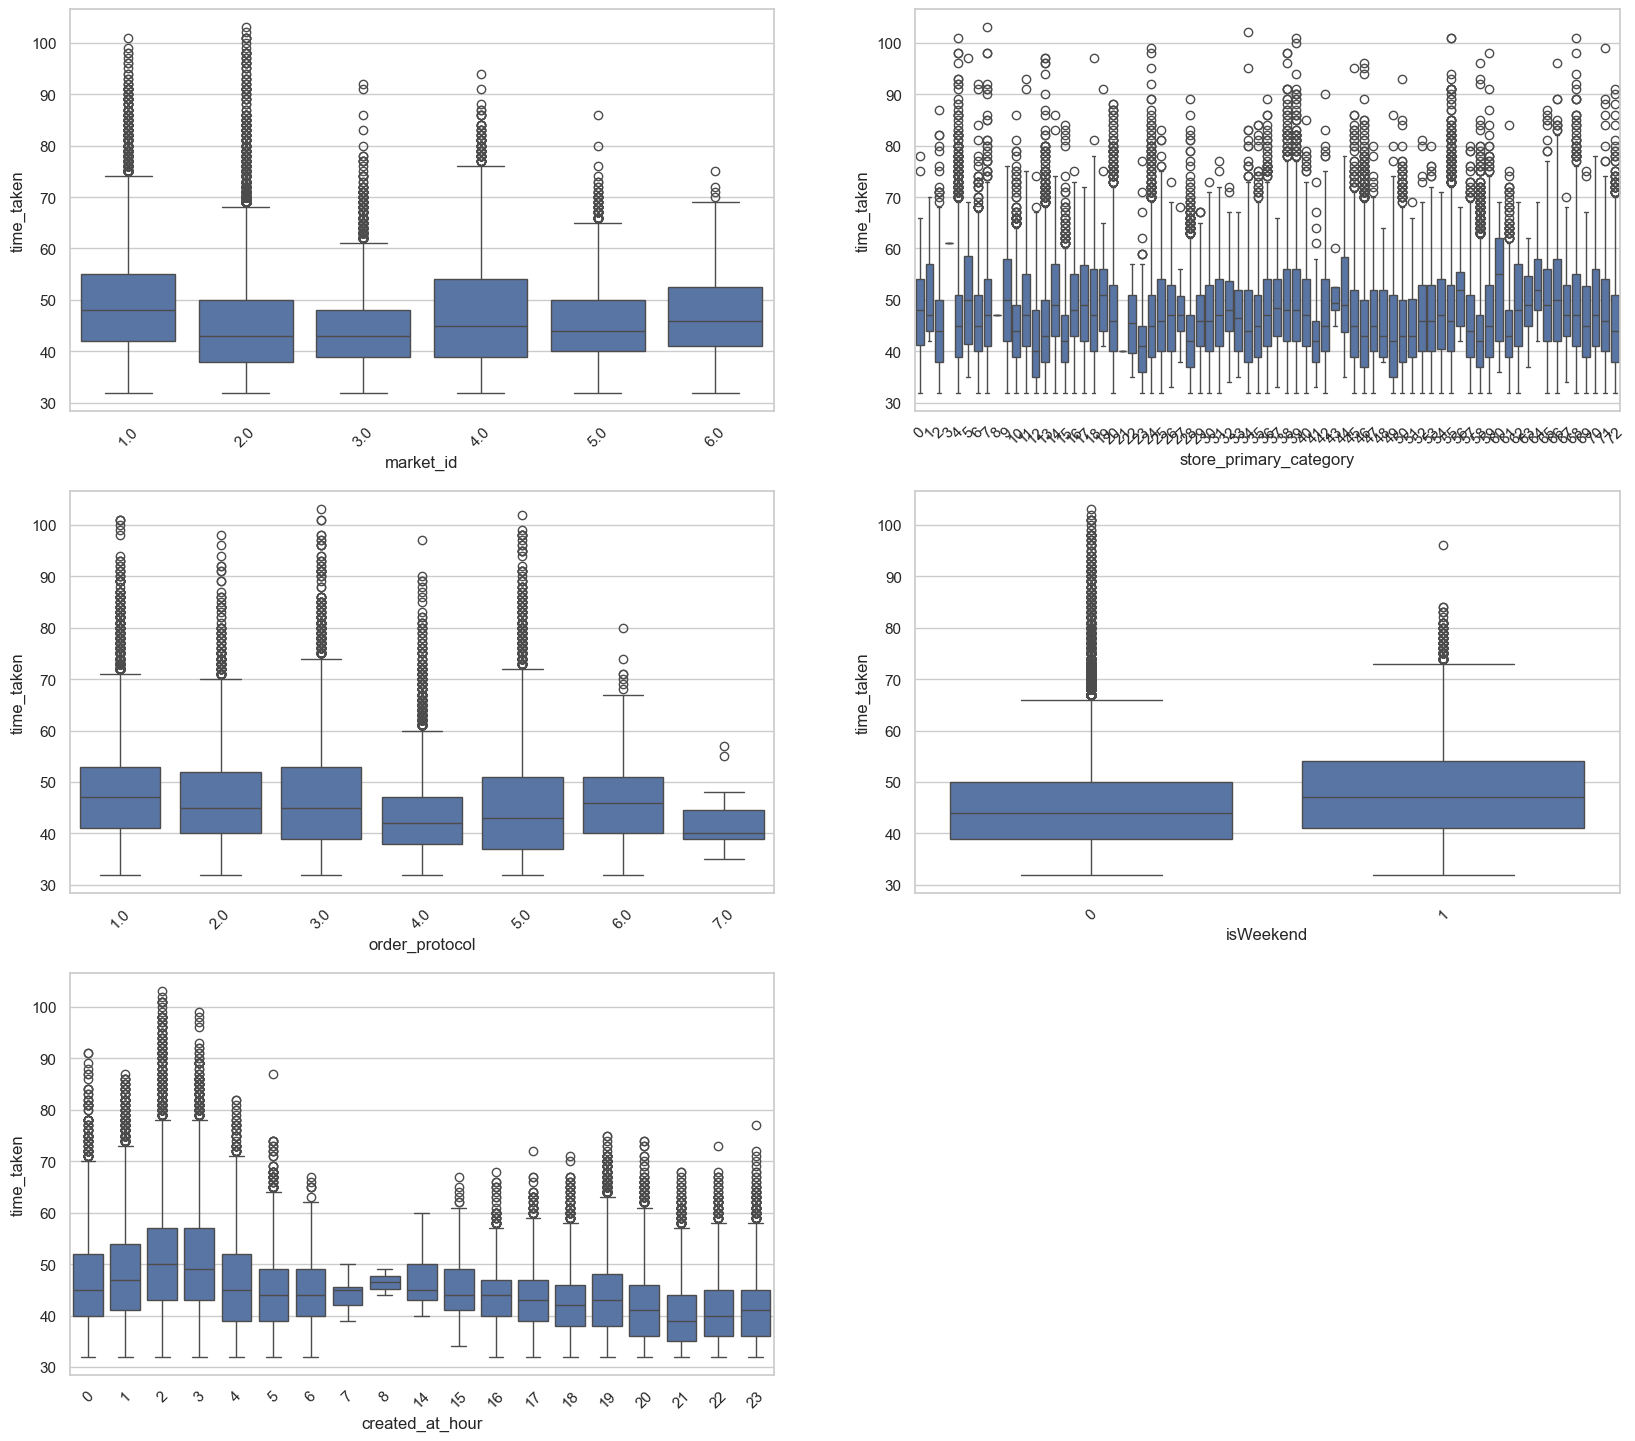

In [318]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(20, 24))
for i, col in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(porter_df_train, x=col, y=y ) 
plt.show()

plt.figure(figsize=(20, 24))
for i, col in enumerate(categorical_columns):
    plt.subplot(4,2,i+1)
    sns.boxplot(porter_df_train, x=col, y=y) 
    plt.xticks(rotation=45)
plt.show()

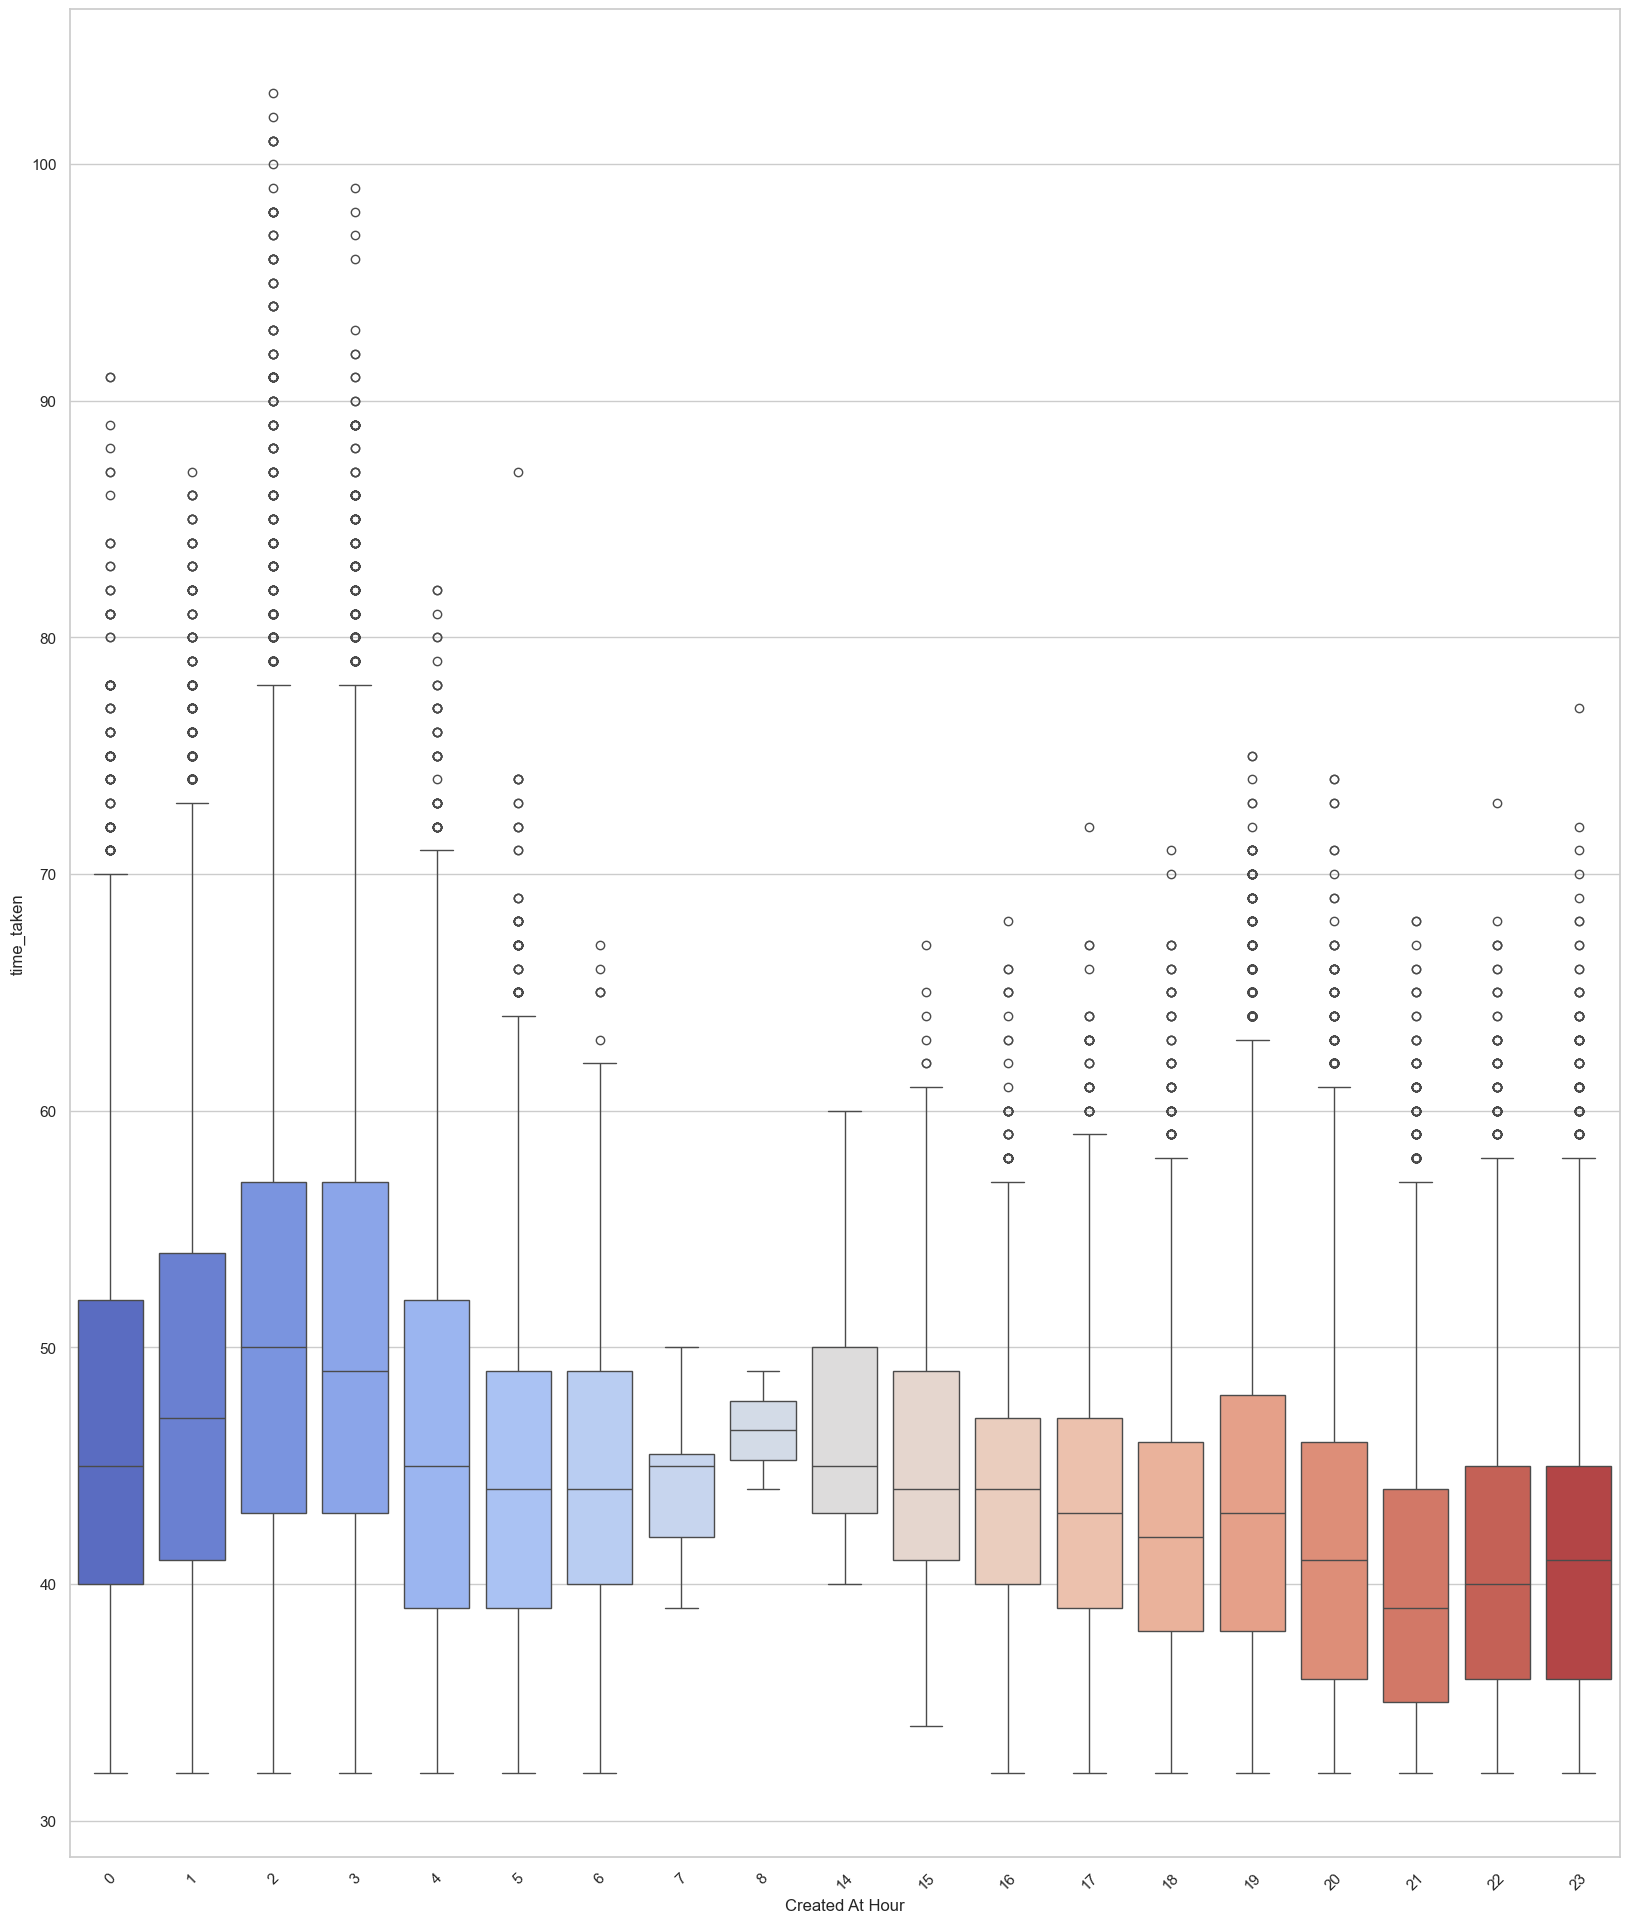

In [321]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(20, 24))
sns.boxplot(porter_df_train, x='created_at_hour', y=y, color='y', palette='coolwarm', legend=False) 
plt.xlabel('Created At Hour')
plt.xticks(rotation=45)
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [323]:
# Plot the heatmap of the correlation matrix
# Compute correlation matrix
correlation_matrix = porter_df_train.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [325]:
# Drop 3-5 weakly correlated columns from training dataset
# 1. Compute correlations with the target
correlations = porter_df_train[numerical_columns].corrwith(y).abs()

# 2. Identify weakly correlated features (e.g., correlation < 0.22)
weak_features = correlations[correlations <= 0.22].index.tolist()
print(f'Removing columns : {weak_features}')
# 3. Drop these from training and test sets
porter_df_train = porter_df_train.drop(columns=weak_features)
porter_df_test = porter_df_test.drop(columns=weak_features)

Removing columns : ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers']


In [327]:
print(f'porter_df_train.shape : {porter_df_train.shape}')
print(f'porter_df_test.shape : {porter_df_test.shape}')

porter_df_train.shape : (140621, 12)
porter_df_test.shape : (35156, 12)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [329]:
# Boxplot for time_taken
plt.figure(figsize=(10, 8))
# Create a boxplot for each numerical column
sns.boxplot(data=porter_df_train, y='time_taken', color='lightblue')
plt.title(f'Boxplot of time_taken')
plt.xlabel('time_taken')
plt.grid(True)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [331]:
# Describe whole df to identify outliers
porter_df_train.describe()

total_items       subtotal  num_distinct_items  max_item_price  \
count  140621.000000  140621.000000       140621.000000   140621.000000   
mean        3.204358    2697.092604            2.673548     1160.720468   
std         2.718707    1830.073210            1.624359      564.134123   
min         1.000000       0.000000            1.000000        0.000000   
25%         2.000000    1415.000000            1.000000      799.000000   
50%         3.000000    2220.000000            2.000000     1095.000000   
75%         4.000000    3407.000000            3.000000     1395.000000   
max       411.000000   26800.000000           20.000000    14700.000000   

       total_outstanding_orders       distance     time_taken  
count             140621.000000  140621.000000  140621.000000  
mean                  58.230094      21.833790      46.188044  
std                   52.670093       8.752255       9.323697  
min                   -6.000000       0.000000      32.000000  
25%                   17.000000      15.320000      39.000000  
50%                   41.000000      21.760000      45.000000  
75%                   85.000000      28.120000      52.000000  
max                  283.000000      83.520000     103.000000

In [333]:
# Handle outliers

# As per above description table it is observed that 
# 1. 'total_busy_dashers' and 'total_outstanding_orders' min values are in -ve 
# 2. 'subtotal' and 'max_item_price' min value are 0.0
# which looks like a errorneous entry lets remove those

porter_df_train=porter_df_train[ (porter_df_train.total_outstanding_orders > 0) & (porter_df_train.subtotal > 0) & (porter_df_train.max_item_price > 0) & (porter_df_train.total_items > 0)]
porter_df_test=porter_df_test[ (porter_df_test.total_outstanding_orders > 0) & (porter_df_test.subtotal > 0) & (porter_df_test.total_items > 0)]

print(f'porter_df_train.shape : {porter_df_train.shape}')
print(f'porter_df_test.shape : {porter_df_test.shape}')
# Note that, we could also observe other outliers as there are huge difference between 75% and max values of different columns 
# but we are not removing those to avoid baiseness of final model

porter_df_train.shape : (137294, 12)
porter_df_test.shape : (34277, 12)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [29]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols=['total_items', 'subtotal', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
categorical_cols=['market_id', 'store_primary_category', 'order_protocol','isWeekend', 'created_at_hour', 'created_on_day', 'num_distinct_items']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [1187]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [1189]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [1191]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [1193]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [1195]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [335]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.feature_selection import RFE

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [337]:
# Apply scaling to the numerical columns

# Preserving unscaled data
porter_df_train_unscaled=porter_df_train.copy()
porter_df_test_unscaled=porter_df_test.copy()
# defined scaler
scaler = MinMaxScaler()

numerical_columns=['distance','total_items','subtotal','num_distinct_items','max_item_price','total_outstanding_orders', 'time_taken']

# Fit on training data and transform both train and test sets
porter_df_train[numerical_columns] = scaler.fit_transform(porter_df_train[numerical_columns])
porter_df_test[numerical_columns] = scaler.transform(porter_df_test[numerical_columns])


print(porter_df_train.shape)
print(porter_df_test.shape)


(137294, 12)
(34277, 12)


In [339]:
# Now, create dummy columns for each of the categorical columns

# Step 1: Create categorical column array
categorical_columns = porter_df_train.columns.difference(numerical_columns)
print(categorical_columns)

# Step 2: Add dummy columns for each categorical column
porter_X_train_encoded = pd.get_dummies(porter_df_train, columns=categorical_columns, drop_first=True)
porter_X_test_encoded = pd.get_dummies(porter_df_test, columns=categorical_columns, drop_first=True)

# Step 3: Align columns (make sure both sets have the same columns)
X_train_encoded, X_test_encoded = porter_X_train_encoded.align(porter_X_test_encoded, join='left', axis=1, fill_value=0)

# Step 4: Apply encoding for each of the newly added dummy columns
for i, col in enumerate(X_train_encoded.columns.difference(numerical_columns)):
    X_train_encoded[col]=X_train_encoded[col].apply(lambda x: 1 if x else 0)
    X_test_encoded[col]=X_test_encoded[col].apply(lambda x: 1 if x else 0)

porter_df_train = X_train_encoded
porter_df_test = X_test_encoded
print(porter_df_test.shape)
print(porter_df_train.shape)

Index(['created_at_hour', 'isWeekend', 'market_id', 'order_protocol',
       'store_primary_category'],
      dtype='object')
(34277, 109)
(137294, 109)


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [341]:
# Create/Initialise the model
lr_model = LinearRegression()

In [343]:
# Train the model using the training data
porter_y_train = porter_df_train['time_taken']
porter_X_train = porter_df_train.drop(columns='time_taken', axis=1)
lr_model.fit(porter_X_train, porter_y_train)

LinearRegression()

In [345]:
# Make predictions
porter_y_test = porter_df_test['time_taken']
porter_X_test = porter_df_test.drop(columns='time_taken', axis=1)
y_pred = lr_model.predict(porter_X_test)

In [347]:
# Find results for evaluation metrics
mae = mean_absolute_error(porter_y_test, y_pred)
rmse = mean_squared_error(porter_y_test, y_pred)
r2 = r2_score(porter_y_test, y_pred)

print("Linear Regression Evaluation Metrics:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# Display the coefficients of the model
coefficients = pd.DataFrame({'Feature': porter_X_test.columns.tolist(),'Coefficient': lr_model.coef_}).sort_values(by='Coefficient', key=abs, ascending=False)
print(coefficients.head(20))

# Visualize the predictions vs actual values
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=porter_y_test, y=y_pred, alpha=0.6)
plt.plot([porter_y_test.min(), porter_y_test.max()], [porter_y_test.min(), porter_y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs Predicted Time Taken') 
plt.show()

Linear Regression Evaluation Metrics:
MAE: 0.060
RMSE: 0.006
R² Score: 0.645
                      Feature   Coefficient
13          created_at_hour_8 -7.435116e+10
5                    distance  5.642178e-01
1                    subtotal  4.548330e-01
4    total_outstanding_orders  3.612589e-01
0                 total_items -1.677260e-01
2          num_distinct_items  1.406531e-01
3              max_item_price  1.358150e-01
38   store_primary_category_3  1.271392e-01
25              market_id_2.0 -1.245925e-01
56  store_primary_category_21 -1.023220e-01
27              market_id_4.0 -9.893598e-02
21         created_at_hour_21 -6.833294e-02
29              market_id_6.0 -6.747005e-02
20         created_at_hour_20 -6.636904e-02
26              market_id_3.0 -5.906235e-02
83  store_primary_category_48 -5.889109e-02
22         created_at_hour_22 -5.130562e-02
28              market_id_5.0 -5.116698e-02
33         order_protocol_5.0 -4.940400e-02
14         created_at_hour_14  4.859083e-02

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [349]:
# Loop through the number of features and test the model

# Get all feature names in the order of appearance
feature_names = porter_X_train.columns.tolist()

# Store performance metrics
rmse_scores = []
r2_scores = []

# Loop through increasing number of features
for i in range(1, len(feature_names) + 1):
    selected_features = feature_names[:i]
    
    # Train model on selected features
    lr = LinearRegression()
    lr.fit(porter_X_train[selected_features], porter_y_train)
    
    # Predict on test set
    y_pred = lr.predict(porter_X_test[selected_features])
    
    # Evaluate
    rmse = mean_squared_error(porter_y_test, y_pred, squared=False)
    r2 = r2_score(porter_y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"{selected_features} Feature(s): RMSE = {rmse:.2f}, R² = {r2:.4f}")

['total_items'] Feature(s): RMSE = 0.13, R² = 0.0565
['total_items', 'subtotal'] Feature(s): RMSE = 0.12, R² = 0.1702
['total_items', 'subtotal', 'num_distinct_items'] Feature(s): RMSE = 0.12, R² = 0.1730
['total_items', 'subtotal', 'num_distinct_items', 'max_item_price'] Feature(s): RMSE = 0.12, R² = 0.1789
['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders'] Feature(s): RMSE = 0.11, R² = 0.3081
['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance'] Feature(s): RMSE = 0.09, R² = 0.4887
['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'created_at_hour_1'] Feature(s): RMSE = 0.09, R² = 0.4887
['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'created_at_hour_1', 'created_at_hour_2'] Feature(s): RMSE = 0.09, R² = 0.4942
['total_items', 'subtotal', 'num_distinct_items', 'max_item

In [351]:
# Build the final model with selected number of features
rfe = RFE(lr,n_features_to_select=8)
rfe=rfe.fit(porter_X_train, porter_y_train)

list(zip(porter_X_train.columns, rfe.support_, rfe.ranking_))

[('total_items', True, 1),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('created_at_hour_1', False, 35),
 ('created_at_hour_2', False, 38),
 ('created_at_hour_3', False, 39),
 ('created_at_hour_4', False, 37),
 ('created_at_hour_5', False, 74),
 ('created_at_hour_6', False, 9),
 ('created_at_hour_7', False, 5),
 ('created_at_hour_8', False, 68),
 ('created_at_hour_14', False, 8),
 ('created_at_hour_15', False, 6),
 ('created_at_hour_16', False, 7),
 ('created_at_hour_17', False, 10),
 ('created_at_hour_18', False, 45),
 ('created_at_hour_19', False, 34),
 ('created_at_hour_20', False, 22),
 ('created_at_hour_21', False, 21),
 ('created_at_hour_22', False, 32),
 ('created_at_hour_23', False, 33),
 ('isWeekend_1', False, 47),
 ('market_id_2.0', False, 3),
 ('market_id_3.0', False, 14),
 ('market_id_4.0', False, 4),
 ('market_id_5.0', False, 16),
 ('market_id_6.0', False, 13),
 ('o

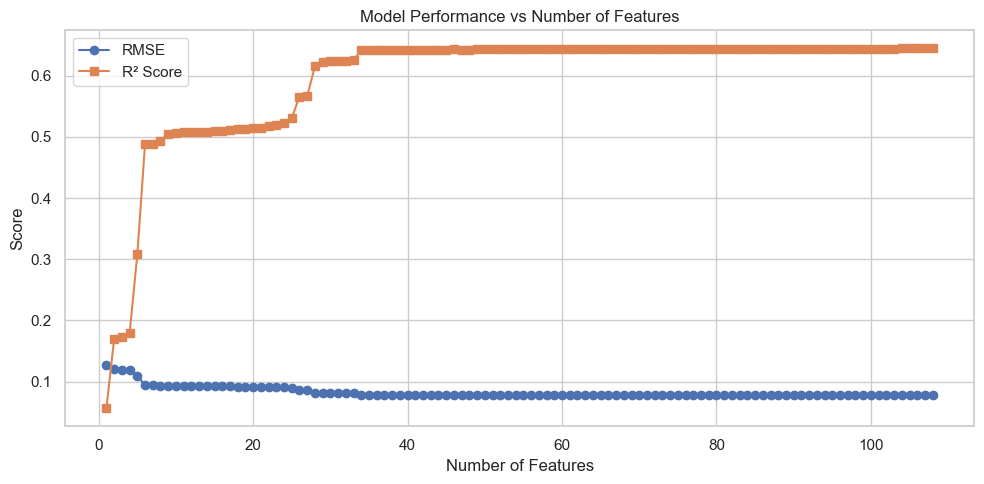

In [353]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(feature_names) + 1), rmse_scores, marker='o', label='RMSE')
plt.plot(range(1, len(feature_names) + 1), r2_scores, marker='s', label='R² Score')
plt.title("Model Performance vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

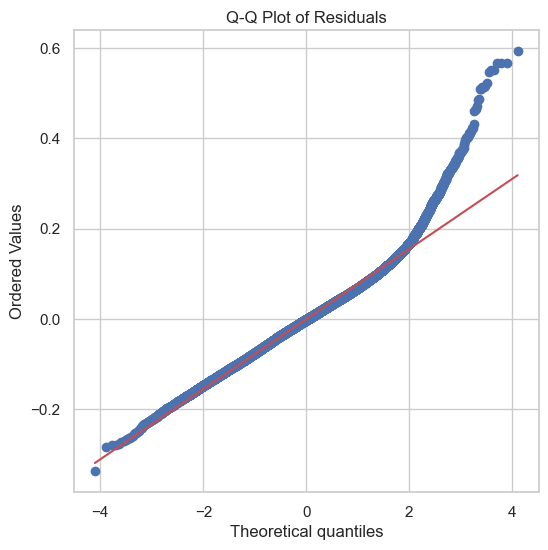

In [355]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = porter_y_test - y_pred
# 1.Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# 2. Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 3. Residual histogram
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [141]:
# Compare the scaled vs unscaled features used in the final model
porter_df_train_scaled=porter_df_train_unscaled.copy()
porter_df_test_scaled=porter_df_test_unscaled.copy()

porter_df_train_scaled[numerical_columns] = scaler.fit_transform(porter_df_train_scaled[numerical_columns])
porter_df_test_scaled[numerical_columns] = scaler.transform(porter_df_test_scaled[numerical_columns])

porter_y_train_scaled = porter_df_train_scaled['time_taken']
porter_X_train_scaled = porter_df_train_scaled.drop(columns='time_taken', axis=1)

model_scaled = LinearRegression()
model_scaled.fit(porter_X_train_scaled, porter_y_train_scaled)

scaled_coeffs = pd.DataFrame({
    'Feature': porter_X_train_scaled.columns,
    'Coefficient_scaled': model_scaled.coef_
})


porter_y_train_unscaled=porter_df_train_unscaled['time_taken']
porter_X_train_unscaled=porter_df_train_unscaled.drop(columns='time_taken', axis=1)
model_unscaled = LinearRegression()
model_unscaled.fit(porter_X_train_unscaled , porter_y_train_unscaled)

unscaled_coeffs = pd.DataFrame({
    'Feature': porter_X_train_unscaled.columns,
    'Coefficient_unscaled': model_unscaled.coef_
})


coeff_compare = pd.merge(scaled_coeffs, unscaled_coeffs, on='Feature')
print(coeff_compare.sort_values(by='Coefficient_scaled', ascending=False))

                     Feature  Coefficient_scaled  Coefficient_unscaled
8                   distance            0.539657              0.458761
4                   subtotal            0.457750              0.001217
7   total_outstanding_orders            0.214105              0.053906
5         num_distinct_items            0.144270              0.539115
6             max_item_price            0.104063              0.000504
10                 isWeekend            0.022525              1.599293
1     store_primary_category            0.000032              0.002248
9            created_at_hour           -0.002412             -0.171284
0                  market_id           -0.009007             -0.639521
2             order_protocol           -0.013773             -0.977885
3                total_items           -0.096618             -0.016731


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [197]:
# Analyze the effect of a unit change in a feature, say 'total_items'
def unit_effect(feature_name, coef_unscaled, coef_scaled, min_val, max_val):
    scale_range = max_val - min_val
    delta_scaled = 1 / scale_range
    effect_scaled = coef_scaled * delta_scaled
    print(f"Feature: {feature_name}")
    print(f"  → Unscaled Coefficient: {coef_unscaled:.4f} → Effect: {coef_unscaled:.4f} minutes per unit")
    print(f"  → Scaled Coefficient:   {coef_scaled:.4f}")
    print(f"  → Effect in real units: {effect_scaled:.4f} minutes ({effect_scaled*60:.2f} seconds)\n")

# Example
for index, row in coeff_compare.iterrows():
    unit_effect(row['Feature'], coef_unscaled=row['Coefficient_unscaled'], coef_scaled=row['Coefficient_scaled'], min_val=1, max_val=15)


Feature: market_id
  → Unscaled Coefficient: -0.6395 → Effect: -0.6395 minutes per unit
  → Scaled Coefficient:   -0.0090
  → Effect in real units: -0.0006 minutes (-0.04 seconds)

Feature: store_primary_category
  → Unscaled Coefficient: 0.0022 → Effect: 0.0022 minutes per unit
  → Scaled Coefficient:   0.0000
  → Effect in real units: 0.0000 minutes (0.00 seconds)

Feature: order_protocol
  → Unscaled Coefficient: -0.9779 → Effect: -0.9779 minutes per unit
  → Scaled Coefficient:   -0.0138
  → Effect in real units: -0.0010 minutes (-0.06 seconds)

Feature: total_items
  → Unscaled Coefficient: -0.0167 → Effect: -0.0167 minutes per unit
  → Scaled Coefficient:   -0.0966
  → Effect in real units: -0.0069 minutes (-0.41 seconds)

Feature: subtotal
  → Unscaled Coefficient: 0.0012 → Effect: 0.0012 minutes per unit
  → Scaled Coefficient:   0.4577
  → Effect in real units: 0.0327 minutes (1.96 seconds)

Feature: num_distinct_items
  → Unscaled Coefficient: 0.5391 → Effect: 0.5391 minutes 

In [357]:
plt.figure(figsize=(35, 40))
index=1
for i, col in enumerate(['total_items', 'distance','subtotal', 'num_distinct_items','max_item_price','total_outstanding_orders']):
    plt.subplot(6,2,i+index)
    sns.scatterplot(x=porter_X_train_scaled[col], y=porter_y_train_scaled, alpha=0.6)
    plt.title(f'Effect of {col} on Time Taken (Scaled Data)')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.grid()
    index=index+1
    plt.subplot(6,2,i+index)
    sns.scatterplot(x=porter_X_train_unscaled[col], y=porter_y_train_unscaled, alpha=0.6)
    plt.title(f'Effect of {col} on Time Taken (Unscaled Data)')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.grid()
plt.show()

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes, there are categorical variables in the data. The categorical variables identified are: `market_id`, `order_protocol`, `isWeekend`, `created_at_hour`, and `store_primary_category`.
>
>From the analysis:
>- `market_id` and `order_protocol` were originally categorical and were one-hot encoded for modeling.
>- `isWeekend` is a binary categorical features indicating whether the order was placed on a weekend.
>- `store_primary_category` is an integer-coded categorical variable representing the primary category of the store.
>- `created_at_hour` is a categorical variable derived from order created field indicates the time of the day when the order was place.

>**Inference about their effect on the dependent variable (`time_taken`):**
>- The coefficients from the linear regression model show that these categorical variables do have an effect on delivery time.
>- For example, different `market_id` and `order_protocol` values (as seen in their dummy variables) have non-zero coefficients, indicating they influence `time_taken`.
>- `isWeekend` also have positive coefficients, suggesting that deliveries on weekends or at night tend to take longer.
>- The effect of `store_primary_category` is relatively small, but it still contributes to the model.  
>Overall, categorical variables help capture differences in delivery time that are not explained by numerical features alone.  



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>When you use `test_size=0.2` attribute while splitting the dataset as show below:
```python
 
 from sklearn.model_selection import train_test_spli
 
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4


>It means you are instructing scikit-learn to:
>-Hold out 20% of the data for testing.  
>- Use the remaining 80% for training.
```



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> A numeric variable `distance` has highest correlation i.e. 0.46 with target variable time_taken.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> First I have checked the description of all the variables to analyze the outliers and observed following cases
>
>  1. `total_outstanding_orders` min value is -ve  
>  2. `subtotal` and `max_item_price` min value are 0.0
>
>which looks like a errorneous entry so i removed those.
>
> Note that, i have also observed other outliers as there are huge difference between 75% and max values of different columns 
> but i did not removed those intentionally to avoid baiseness of final model



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final model, following are the top 3 features significantly affecting the delivery time.
>- `total_outstanding_orders=3.612589e-01` : This feature has the positive coefficient with `time_taken`, indicating that more outstanding orders increases the delivery time.
>- `subtotal=4.548330e-01` : This feature has positive coefficient with `time_taken`, which indicates more the expensive orders slower the deliveries
>- `distance=5.642178e-01` : This feature has the strongest positive coefficient with `time_taken`, indicating that longer distances lead to higher delivery times.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is a **supervised learning** algorithm used for predicting a **continuous dependent variable** (output) based on one or more **independent variables (input features)**. The goal is to find a linear relationship between the input and output.
>#### Types of Linear Regression ####
> 1. **Simple Linear Regression:**  
>    Involves one independent variable (X) and one dependent variable (Y).  
>    Example: Predicting a house price based on square footage.  
>    Equation : $Y={\beta}_{0}+{\beta}_{1}X+e$
> 2. **Multiple Linear Regression:**  
>    Involves two or more independent variables.  
>    Example: Predicting house price based on square footage, number of bedrooms, and location.  
>    Equation : $Y={\beta}_{0}+{\beta}_{1}X_{1}+{\beta}_{2}X_{2}+{\beta}_{3}X_{3}+....+{\beta}_{n}X_{n}+e$
>
>    
>    Where:
>
>    
>    $Y$: Predicted (dependent) variable  
>    $X$: Independent variable  
>    ${\beta}_{0}$: Intercept (value of Y when X = 0)  
>    ${\beta}_{1}$: Slope (rate of change of Y with respect to X)  
>    $e$: Error term (difference between actual and predicted Y)
>#### Model Evaluation Metrics ####
> 1. **$R^2$ (Coefficient of Determination)**: Proportion of variance in Y explained by X.  
>     i. Ranges from 0 to 1.  
>    ii. Higher R² = better fit.
> 2. **MAE (Mean Absolute Error)**
> 3. **MSE (Mean Squared Error)**
> 4. **RMSE (Root Mean Squared Error)**
>
>#### Summary  ####
>Linear Regression is a foundational technique in predictive modeling. It helps in understanding relationships and making numeric predictions. Although simple, it's powerful and widely used — especially in business, economics, and early-stage machine learning projects.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>The key difference between *Simple Linear Regression* and *Multiple Linear Regression* lies in the number of *independent* variables used to predict the _dependent_ variable.
>
>Following are the main differences between simple and multiple regressions
>
>### Simple Linear Regression ###
> **Definition:** Simple Linear Regression models the relationship between one independent variable (X) and one dependent variable (Y).  
> **Equation:** $Y={\beta}_{0}+{\beta}_{1}X+e$
>
>  $Y$: Dependent (target) variable,  
>  $X$: Independent variable,  
>  ${\beta}_{0}$: Intercept,  
>  ${\beta}_{1}$: Slope coefficient,  
>  $e$: Error term
>
> **Example:** Predicting house price based on just the square footage:
>
>  $Price = {\beta}_{0} + {\beta}_{1}×Area$
>
>### Multiple Linear Regression ###
>**Definition:** Multiple Linear Regression models the relationship between two or more independent variables $({X}_{1}, {X}_{2}, ..., {X}_{n})$ and one dependent variable (Y).
>**Equation:** $Y={\beta}_{0}+{\beta}_{1}X_{1}+{\beta}_{2}X_{2}+{\beta}_{3}X_{3}+....+{\beta}_{n}X_{n}+e$
>
> $X_{1}, X_{2}, X_{3}....,X_{n}$: Independent variables  
> ${\beta}_{0}, {\beta}_{1}, {\beta}_{2},.....,{\beta}_{n}$: Coefficients (slopes)
>
> **Example:** Predicting house price based on:
> - Square footage
> - Number of bedrooms
> - Distance to metro
>  
> $Price={\beta}_{0} + {\beta}_{1}×Area + {\beta}_{2}×Bedrooms+{\beta}_{3}×Distance$



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> The **cost function** measures how well the model's predictions match the actual data. In linear regression, the most commonly used cost function is:  
> **Mean Squared Error(MSE)**
>
> $J({\beta}_{0}, {\beta}_{1})=\frac{1}{n}\sum_{i=1}^{n}({Y}_{i}-\overline{Y}_{i})^2$
>
> Where:
>
> ${Y}_{i}$: Actual value,
> $\overline{Y}_{i}$: Predicted value from the model,
> $n$: Number of data points,
> ${\beta}_{0}, {\beta}_{1}$: Model parameters (intercept and slope)
>
> **Purpose of the Cost Function**
>
> - It quantifies the error between predicted and actual values.
> - Our goal is to find the parameters (${\beta}_{0}, {\beta}_{1}$) that minimize this error — in other words, to find the "best-fit line".
>
> **How Is the Cost Function Minimized?**
> 
> There are two common approaches:  
> ##### 1. Analytical Solution (Ordinary Least Squares)
>  For simple or multiple linear regression, there's a closed-form formula to directly compute optimal parameters:
> ${\beta}=({X}^T{X})^{-1}X^TY$  
> Where:  
> - $X$: Feature matrix,
> - $Y$: Target vector,
> - ${\beta}$ : Vector of coefficients
> - This is fast and exact — used when the dataset is small or medium-sized.
>
> ##### 2. Gradient Descent (Iterative Optimization)
>   When the dataset is too large for matrix inversion or analytical solutions, we use gradient descent:
>
>**Steps:**
> - Initialize ${\beta}_{0}, {\beta}_{1}$ randomly.
> - Compute the gradient (partial derivatives of the cost function).
> - Update parameters in the direction that reduces the cost:
>   ${\beta}_{j}:={\beta}_{j}-{\alpha}.\frac{{\sigma}{J}}{{\sigma}{\beta}_{j}}$
>   Where:  ${\alpha}$: Learning rate (step size), $\frac{{\sigma}{J}}{{\sigma}{\beta}_{j}}$ : Gradient of the cost function w.r.t. parameter
> - Repeat until convergence (when the cost stops decreasing significantly). 




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>#### Underfitting
>**Definition:** Underfitting happens when a model is too simple to capture the underlying patterns in the data.
>
>**Symptoms:**
>- Poor performance on both training and test data
>- High bias (the model makes overly simplistic assumptions)
> 
>**Example:** Fitting a straight line to complex, curved data — the model misses key trends.
>
>**Causes:**
>  - Model is too basic (e.g., linear regression on non-linear data)
>  - Not enough features
>  - Too much regularization
>  - Insufficient training
>
>#### Overfitting
>**Definition:** Overfitting occurs when a model is too complex and fits both the data and the noise.
>
>**Symptoms:**
>- Very good performance on training data
>- Poor performance on test or unseen data
>- High variance (model is too sensitive to training data)
>
>**Example:** A high-degree polynomial curve that bends and twists to go through every data point — it captures noise, not just signal.
>
>**Causes:**
>- Too complex model (e.g., too many features or layers)
>- Insufficient training data
>- Lack of regularization
>- Training for too many epochs





---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>**Residual plots** are powerful diagnostic tools in linear regression. They help you assess **whether the assumptions of linear regression are being met** — and whether the model is appropriate for your data.  
>
>**What is a Residual?**  
>A residual is the difference between the actual value and the predicted value:  
>
>$Residual=Y_{actual}-Y_{predicted}$
>
>A residual plot displays these residuals on the Y-axis and the corresponding predicted values (or input X values) on the X-axis.
>
>**How Residual Plots Help?**
>
>**1. Check Linearity**
>- What to look for: Residuals should be randomly scattered around the horizontal axis (zero).
>- Why it matters: If there's a clear pattern (like a curve), it suggests a non-linear relationship that your model missed.
>
>**2. Detect Homoscedasticity (Constant Variance)**  
>- What to look for: Spread of residuals should be roughly the same across all levels of X.
>- **Problem:** If the residuals fan out or narrow in, you have heteroscedasticity (unequal variance), which violates regression assumptions and affects reliability of predictions.
>
>**3. Identify Outliers or Influential Points**
>- What to look for: Points far away from the rest — large residuals — might be outliers.
>- **Action:** Investigate whether these are data errors or influential observations that skew your model.
>
>**4. Check for Independence**  
>- If residuals are not independent (e.g., show cycles or trends), it might mean:
>    - The data is time-series and autocorrelated.
>    - You missed important variables.
>
>**Conclusion:**  
>If your residual plot shows random scatter, you're likely satisfying the regression assumptions.  
>If not, you might need to:
>- Use a different model (e.g., polynomial regression)
>- Transform variables
>- Handle outliers
>- Consider non-linear methods

